# Dataset SETUP
     

In [1]:
!pip install Cmake
!pip install tensorflow==2.10.0 tensorflow-io==0.27.0
!pip install tensorflow-io
!pip install kafka-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.0/25.0 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 95.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 99.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 96.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 64.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorflow-io-gcs-fil

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.5/246.5 kB 6.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import keras
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [3]:
!pip install gdown

In [4]:
!gdown 1lBYbdZSI-8jKoMp8m8CLKOtcyF3Id02u
!unzip data_parquet.zip

Downloading...
From (original): https://drive.google.com/uc?id=1lBYbdZSI-8jKoMp8m8CLKOtcyF3Id02u
From (redirected): https://drive.google.com/uc?id=1lBYbdZSI-8jKoMp8m8CLKOtcyF3Id02u&confirm=t&uuid=3d9dcba5-bf0c-4c3f-83fe-49242d96b75e
To: /content/data_parquet.zip
100% 493M/493M [00:23<00:00, 20.9MB/s]
Archive:  data_parquet.zip
  inflating: data.parquet            


In [5]:
!pip show tensorflow

Name: tensorflow
Version: 2.10.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, keras-preprocessing, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


In [6]:
import numpy as np
import pandas as pd
import os

df = pd.read_parquet("/content/data.parquet")
columns_to_scale = ['aimp', 'amud', 'arnd', 'asin1', 'asin2', 'adbr', 'adfl', 'bed1', 'bed2', 'bfo1', 'bfo2', 'bso1', 'bso2', 'bso3', 'ced1', 'cfo1', 'cso1']

#Data Pre-processing:
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df_train=df[0:400000]
df_val=df[400001:500001]
df_test = df[1000000:1300000]

In [7]:
df.head()

,aimp,amud,arnd,asin1,asin2,adbr,adfl,bed1,bed2,bfo1,bfo2,bso1,bso2,bso3,ced1,cfo1,cso1,y
2022-01-01 00:00:00,-0.100231,-0.105518,-0.037420,-0.001943,-0.000619,-1.00289,-1.237048,-1.402501,-0.621427,-0.958653,-3.393666,-0.172075,-0.878695,-2.959234,-1.418196,0.236908,-2.447507,0.0
2022-01-01 00:00:01,-0.100231,-0.105518,-0.029447,-0.001915,-0.000336,-1.00289,-1.237048,-1.402501,-0.621427,-0.958653,-3.393666,-0.172026,-0.878695,-2.959234,-1.418196,0.236909,-2.447445,0.0
2022-01-01 00:00:02,-0.100231,-0.105518,-0.009867,-0.001886,-0.000053,-1.00289,-1.237048,-1.402501,-0.621427,-0.958653,-3.393666,-0.171881,-0.878695,-2.959234,-1.418196,0.236913,-2.447264,0.0
2022-01-01 00:00:03,-0.100231,-0.105518,0.035402,-0.001858,0.000230,-1.00289,-1.237048,-1.402501,-0.621427,-0.958653,-3.393666,-0.171645,-0.878695,-2.959234,-1.418196,0.236923,-2.446970,0.0
2022-01-01 00:00:04,-0.100231,-0.105518,0.073974,-0.001830,0.000513,-1.00289,-1.237048,-1.402501,-0.621427,-0.958653,-3.393666,-0.171321,-0.878695,-2.959234,-1.418196,0.236939,-2.446569,0.0


# Kafka SETUP

In [8]:
import os
from datetime import datetime
import time
import threading
import json
from kafka import KafkaProducer
from kafka.errors import KafkaError
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow as tf
import tensorflow_io as tfio

In [9]:
#Download and extract Kafka:

!curl -sSOL https://dlcdn.apache.org/kafka/3.7.0/kafka_2.13-3.7.0.tgz
!tar -xzf kafka_2.13-3.7.0.tgz

In [10]:
# Start Zookeeper in daemon (background) mode using the specified configuration file
!./kafka_2.13-3.7.0/bin/zookeeper-server-start.sh -daemon ./kafka_2.13-3.7.0/config/zookeeper.properties

# Start the Kafka server in daemon (background) mode using the specified configuration file
!./kafka_2.13-3.7.0/bin/kafka-server-start.sh -daemon ./kafka_2.13-3.7.0/config/server.properties

# Print a message to inform the user that the system is waiting for 10 seconds
!echo "Waiting for 10 secs until kafka and zookeeper services are up and running"

# Pause the script execution for 10 seconds to allow services to start up properly
!sleep 10

Waiting for 10 secs until kafka and zookeeper services are up and running


In [11]:
# List all processes and filter the output to show only those related to Kafka
!ps -ef | grep kafka

root        2554     831  0 15:36 ?        00:00:00 /bin/bash -c ps -ef | grep kafka
root        2556    2554  0 15:36 ?        00:00:00 grep kafka


In [12]:
# Create a Kafka topic named 'cats-train' with a replication factor of 1 and 1 partition
# Replication Factor: This defines the number of copies of the data across the Kafka cluster.
# Partitions: Partitions are the basic unit of parallelism in Kafka. Each topic can be split into multiple partitions, and each partition can be hosted on different brokers.
!./kafka_2.13-3.7.0/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic cats-train

# Create a Kafka topic named 'cats-test' with a replication factor of 1 and 2 partitions
!./kafka_2.13-3.7.0/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 2 --topic cats-test

Created topic cats-train.
Created topic cats-test.


In [13]:
# Describe the Kafka topic 'cats-train' to get detailed information about it
!./kafka_2.13-3.7.0/bin/kafka-topics.sh --describe --bootstrap-server 127.0.0.1:9092 --topic cats-train

# Describe the Kafka topic 'cats-test' to get detailed information about it
!./kafka_2.13-3.7.0/bin/kafka-topics.sh --describe --bootstrap-server 127.0.0.1:9092 --topic cats-test

Topic: cats-train	TopicId: OO9qwpqERSWAsCjlFf2ZZA	PartitionCount: 1	ReplicationFactor: 1	Configs: 
	Topic: cats-train	Partition: 0	Leader: 0	Replicas: 0	Isr: 0
Topic: cats-test	TopicId: UQM_DV9JTCqVbQ9VZDf6iw	PartitionCount: 2	ReplicationFactor: 1	Configs: 
	Topic: cats-test	Partition: 0	Leader: 0	Replicas: 0	Isr: 0
	Topic: cats-test	Partition: 1	Leader: 0	Replicas: 0	Isr: 0


In [14]:
#Divisione in Train, Validation e Test

x_train_df = df_train.drop(["y"], axis=1)
y_train_df = df_train["y"]


x_val_df = df_val.drop(["y"], axis=1)
y_val_df = df_val["y"]

x_test_df = df_test.drop(["y"], axis=1)
y_test_df = df_test["y"]

x_test = list(filter(None, x_test_df.to_csv(index=False).split("\n")[1:]))
y_test = list(filter(None, y_test_df.to_csv(index=False).split("\n")[1:]))


NUM_COLUMNS = len(x_test_df.columns)

In [15]:
def error_callback(exc):
    raise Exception('Error while sending data to Kafka: {0}'.format(str(exc)))


# Define a function to send messages to a specified Kafka topic.
def write_to_kafka(topic_name, items):
    # Initialize a counter to keep track of the number of messages sent.
    count = 0

    # Create a Kafka producer that connects to a Kafka server at '127.0.0.1:9092'.
    producer = KafkaProducer(bootstrap_servers=['127.0.0.1:9092'])

    # Iterate over each (message, key) pair in the `items` iterable.
    for message, key in items:
        # Send the message to the specified Kafka topic with the key and value encoded in UTF-8.
        # Attach the error callback to handle any errors that occur during sending.
        producer.send(topic_name, key=key.encode('utf-8'), value=message.encode('utf-8')).add_errback(error_callback)

        # Increment the count of messages sent.
        count += 1

    # Ensure that all buffered messages are sent to the Kafka topic before proceeding.
    producer.flush()


    print("Wrote {0} messages into topic: {1}".format(count, topic_name))


write_to_kafka("cats-test", zip(x_test, y_test))


Wrote 300000 messages into topic: cats-test


In [16]:
def build_autoencoder(k):

    model = models.Sequential()
    # Encoder layer part
    model.add(keras.Input(shape=(k,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))  # bottleneck layer
    # Decoder layer part
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(k, activation='tanh'))
    return model

In [17]:
# Compile the Model
input_shape = 17
autoencoder = build_autoencoder(input_shape)
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 32)                544       
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 17)                1105      
                                                                 
Total params: 7,521
Trainable params: 7,521
Non-trainabl

Epoch 1/30
4375/4375 [==============================] - 13s 3ms/step - loss: 0.1637 - accuracy: 0.5766 - val_loss: 0.1539 - val_accuracy: 0.6327
Epoch 2/30
4375/4375 [==============================] - 14s 3ms/step - loss: 0.1439 - accuracy: 0.6269 - val_loss: 0.1515 - val_accuracy: 0.6179
Epoch 3/30
4375/4375 [==============================] - 12s 3ms/step - loss: 0.1418 - accuracy: 0.6148 - val_loss: 0.1486 - val_accuracy: 0.6724
Epoch 4/30
4375/4375 [==============================] - 13s 3ms/step - loss: 0.1405 - accuracy: 0.6295 - val_loss: 0.1473 - val_accuracy: 0.6925
Epoch 5/30
4375/4375 [==============================] - 14s 3ms/step - loss: 0.1397 - accuracy: 0.6386 - val_loss: 0.1464 - val_accuracy: 0.5590
Epoch 6/30
4375/4375 [==============================] - 12s 3ms/step - loss: 0.1392 - accuracy: 0.6340 - val_loss: 0.1458 - val_accuracy: 0.6595
Epoch 7/30
4375/4375 [==============================] - 11s 3ms/step - loss: 0.1386 - accuracy: 0.6752 - val_loss: 0.1449 - val_ac

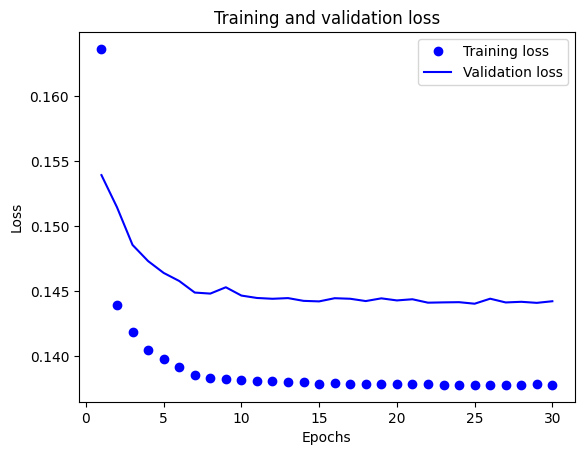

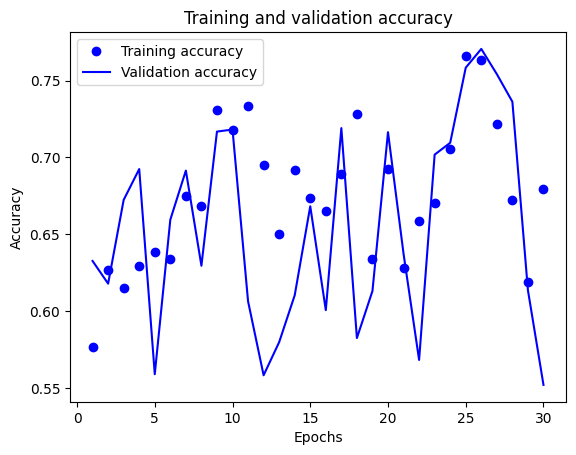

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Model training
history = autoencoder.fit(x_train_df, x_train_df, epochs=30, batch_size=64, validation_split=0.3)

# Extract loss and accuracy
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history.get('accuracy', [])  # If there is no accuracy, leave the list empty
val_accuracy = history.history.get('val_accuracy', [])  # If there is no validation accuracy, leave the list empty
epochs = range(1, len(loss) + 1)

# Save results to a CSV file
results_df = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': loss,
    'Validation Loss': val_loss,
    'Training Accuracy': accuracy if accuracy else [None] * len(epochs),  # Fill with None if empty
    'Validation Accuracy': val_accuracy if val_accuracy else [None] * len(epochs)  # Fill with None if empty
})

results_df.to_csv('training_results.csv', index=False)
print("Training results saved in training_results.csv")

# Plot Loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Accuracy
if accuracy and val_accuracy:  # Plot only if there are accuracy data
    plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


In [19]:
#Calcola l'errore di ricostruzione sui dati di validazione

validation_data = x_val_df
reconstructions = autoencoder.predict(validation_data)
reconstruction_errors = np.mean((validation_data - reconstructions)**2, axis=1)
threshold = np.percentile(reconstruction_errors, 95)

3125/3125 [==============================] - 5s 2ms/step


In [20]:
print(x_val_df)

                         aimp      amud      arnd     asin1     asin2  \
2022-01-05 15:06:41 -0.100231  0.337557 -0.351310  1.394175 -1.406548   
2022-01-05 15:06:42 -0.100231  0.337557 -0.369754  1.394171 -1.406579   
2022-01-05 15:06:43 -0.100231  0.337557 -0.350163  1.394167 -1.406610   
2022-01-05 15:06:44 -0.100231  0.337557 -0.368821  1.394162 -1.406641   
2022-01-05 15:06:45 -0.100231  0.337557 -0.339348  1.394158 -1.406672   
...                       ...       ...       ...       ...       ...   
2022-01-06 18:53:16 -0.100231  0.400853 -0.461845 -0.769537 -0.717870   
2022-01-06 18:53:17 -0.100231  0.400853 -0.469383 -0.769561 -0.717627   
2022-01-06 18:53:18 -0.100231  0.400853 -0.478897 -0.769585 -0.717383   
2022-01-06 18:53:19 -0.100231  0.400853 -0.494081 -0.769609 -0.717139   
2022-01-06 18:53:20 -0.100231  0.400853 -0.471253 -0.769632 -0.716895   

                        adbr      adfl      bed1      bed2      bfo1  \
2022-01-05 15:06:41 -1.00289  0.808376 -1.184164 -0

In [21]:
print(threshold)

0.37608647433264353


In [22]:
BATCH_SIZE=64

# ONLINE TRAINING SIMULATION

In [23]:
# Create a KafkaGroupIODataset using TensorFlow I/O (tfio) experimental streaming API.

test_ds = tfio.experimental.streaming.KafkaGroupIODataset( #This specific dataset is designed to consume data from Kafka topics in a streaming fashion, enabling real-time data processing within TensorFlow workflows.

    topics=["cats-test"],  # Specify the Kafka topic(s) from which data will be consumed.
    group_id="testcg",  # Set the consumer group ID for coordinating message consumption.
    servers="127.0.0.1:9092",  # Define the Kafka broker(s) address for establishing connection.
    stream_timeout=10000,  # Set the stream timeout in milliseconds
    configuration=[
        "session.timeout.ms=7000",  # Configure session timeout for Kafka consumer in milliseconds.
        "max.poll.interval.ms=8000",  # Configure maximum poll interval for Kafka consumer in milliseconds.
        "auto.offset.reset=earliest"  # Set the consumer to read from the earliest available offset on startup.
    ],
)


# Define a function to decode Kafka messages and keys into structured data.
def decode_kafka_test_item(raw_message, raw_key):
    # Decode the raw_message (CSV format) into a TensorFlow tensor with default values of 0.0 for each column.
    message = tf.io.decode_csv(raw_message, [[0.0] for i in range(NUM_COLUMNS)])

    # Convert the raw_key from string format to a numerical TensorFlow tensor.
    key = tf.strings.to_number(raw_key)

    # Return a tuple of decoded message and key.
    return (message, key)

# Apply the decode_kafka_test_item function to each element in test_ds using the map transformation.
test_ds = test_ds.map(decode_kafka_test_item)
test_ds = test_ds.batch(BATCH_SIZE)

Instructions for updating:
Use `tf.data.Dataset.take_while(...)


In [24]:
predictions = []
ground_truths = []

# Iterate over the dataset and perform inference
for batch in test_ds:
    inputs, labels = batch
    # Perform inference
    preds = autoencoder.predict(inputs)
    mse = np.mean(np.power(inputs - preds, 2), axis=1)
    # Convert probabilities to binary classes (0 or 1) using a threshold of 0.5
    binary_preds = mse > threshold

    # Extend the lists with new predictions and ground truth
    predictions.extend(binary_preds)
    ground_truths.extend(labels.numpy())

# Save the results to a CSV file
# Assuming predictions are single-dimensional vectors
df = pd.DataFrame({
    'Prediction': [pred[0] if isinstance(pred, (list, np.ndarray)) else pred for pred in predictions],
    'Ground Truth': ground_truths
})

df.to_csv('predictions_vs_ground_truth.csv', index=False)

print("Predictions and ground truth saved to predictions_vs_ground_truth.csv")


1/1 [==============================] - 0s 17ms/step
Predictions and ground truth saved to predictions_vs_ground_truth.csv


Evaluation metrics saved to evaluation_metrics.csv


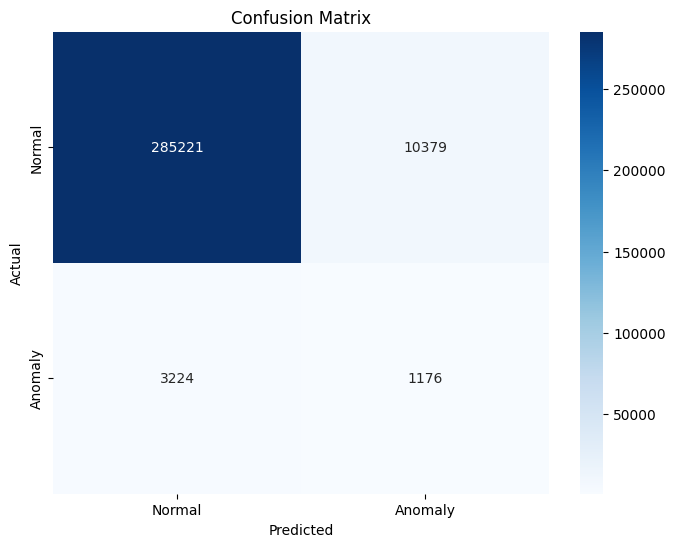

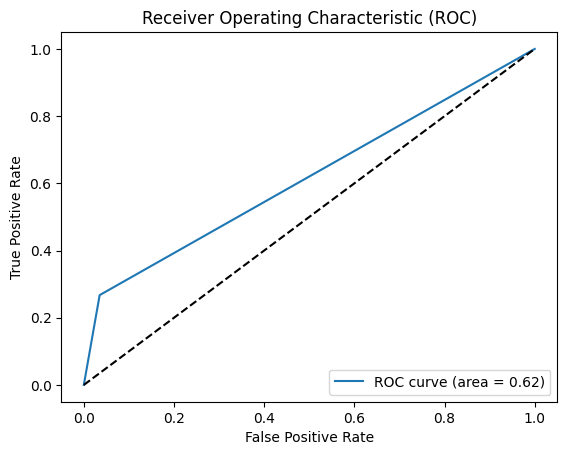

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Calculate metrics
accuracy = accuracy_score(ground_truths, predictions)
precision = precision_score(ground_truths, predictions)
recall = recall_score(ground_truths, predictions)
f1 = f1_score(ground_truths, predictions)
roc_auc = roc_auc_score(ground_truths, predictions)

# Calculate confusion matrix
conf_matrix = confusion_matrix(ground_truths, predictions)

# Save metrics to a CSV file
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC'],
    'Value': [accuracy, precision, recall, f1, roc_auc]
})

metrics_df.to_csv('evaluation_metrics.csv', index=False)
print("Evaluation metrics saved to evaluation_metrics.csv")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(ground_truths, predictions)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.savefig('roc_curve.png')
plt.show()